In [2]:
import pymysql
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

%matplotlib inline
warnings.filterwarnings('ignore')

# mysql classicmodels

- quantityOrdered : 판매수량
- priceEach : 판매가격
- buyprice : 원가(제품의 원가를 buyprice 하나로 가정한다)

In [3]:
sql = pymysql.connect(host = 'localhost', user = 'root', password = '951824', db='classicmodels', charset='utf8')
curs = sql.cursor()

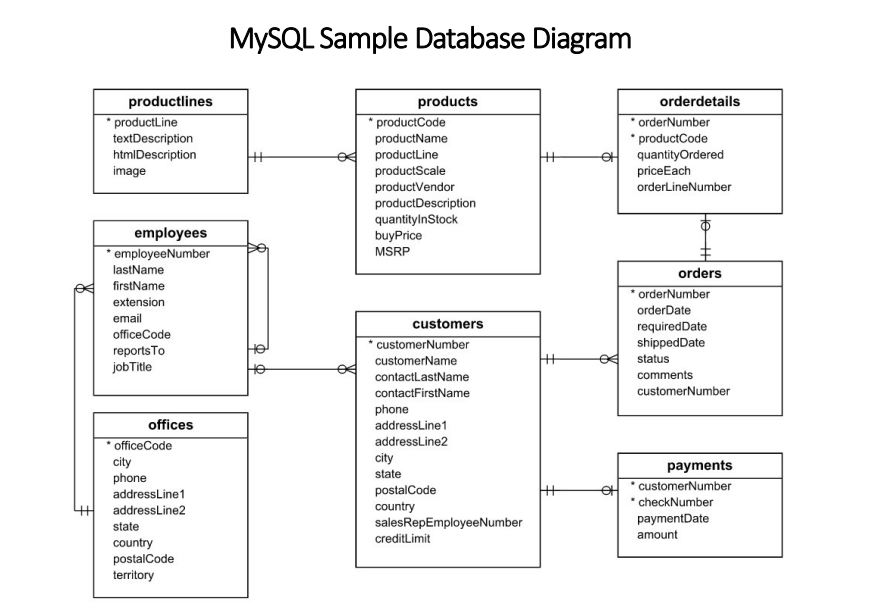

In [4]:
Image('C:/Users/Park/Desktop/data/Mysql/classicmodels.png')

In [5]:
df = pd.read_sql('select a.customerNumber, a.customerName,a.country,b.orderNumber,b.orderDate, b.status from customers a left join orders b on a.customerNumber=b.customerNumber',sql)
orders = pd.read_sql('select orderNumber, requiredDate, shippedDate from orders',sql)
df = pd.merge(df,orders,how='left', on='orderNumber')
orderdetails = pd.read_sql('select * from orderdetails',sql)
df = pd.merge(df,orderdetails,how='left', on='orderNumber')
products = pd.read_sql('select productCode,productName, productLine, buyprice from products',sql)
df = pd.merge(df,products,how='left', on='productCode')
df

,customerNumber,customerName,country,orderNumber,orderDate,status,requiredDate,shippedDate,productCode,quantityOrdered,priceEach,orderLineNumber,productName,productLine,buyprice
0,103,Atelier graphique,France,10123.0,2003-05-20,Shipped,2003-05-29,2003-05-22,S18_1589,26.0,120.71,2.0,1965 Aston Martin DB5,Classic Cars,65.96
1,103,Atelier graphique,France,10123.0,2003-05-20,Shipped,2003-05-29,2003-05-22,S18_2870,46.0,114.84,3.0,1999 Indy 500 Monte Carlo SS,Classic Cars,56.76
2,103,Atelier graphique,France,10123.0,2003-05-20,Shipped,2003-05-29,2003-05-22,S18_3685,34.0,117.26,4.0,1948 Porsche Type 356 Roadster,Classic Cars,62.16
3,103,Atelier graphique,France,10123.0,2003-05-20,Shipped,2003-05-29,2003-05-22,S24_1628,50.0,43.27,1.0,1966 Shelby Cobra 427 S/C,Classic Cars,29.18
4,103,Atelier graphique,France,10298.0,2004-09-27,Shipped,2004-10-05,2004-10-01,S10_2016,39.0,105.86,1.0,1996 Moto Guzzi 1100i,Motorcycles,68.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,496,Kelly's Gift Shop,New Zealand,10399.0,2005-04-01,Shipped,2005-04-12,2005-04-03,S12_2823,29.0,123.51,5.0,2002 Suzuki XREO,Motorcycles,66.27
3016,496,Kelly's Gift Shop,New Zealand,10399.0,2005-04-01,Shipped,2005-04-12,2005-04-03,S18_2625,30.0,51.48,4.0,1936 Harley Davidson El Knucklehead,Motorcycles,24.23
3017,496,Kelly's Gift Shop,New Zealand,10399.0,2005-04-01,Shipped,2005-04-12,2005-04-03,S24_1578,57.0,104.81,3.0,1997 BMW R 1100 S,Motorcycles,60.86
3018,496,Kelly's Gift Shop,New Zealand,10399.0,2005-04-01,Shipped,2005-04-12,2005-04-03,S24_2000,58.0,75.41,2.0,1960 BSA Gold Star DBD34,Motorcycles,37.32


### 데이터 분석을 위한 변수 추가

1. 주문 월 변수 생성
2. 매출액 변수 생성 (quantityOrdered x priceEach)
3. 매출원가 변수 생성 (quantityOrdered x buyprice)
4. 순이익 변수 생성 (2 - 3)

In [6]:
df['OrderMonth'] = df.orderDate.astype(str).str[5:7]
df['revenue'] = df.quantityOrdered * df.priceEach
df['cost'] = df.quantityOrdered * df.buyprice
df['profit'] = df.revenue - df.cost
df

,customerNumber,customerName,country,orderNumber,orderDate,status,requiredDate,shippedDate,productCode,quantityOrdered,priceEach,orderLineNumber,productName,productLine,buyprice,OrderMonth,revenue,cost,profit
0,103,Atelier graphique,France,10123.0,2003-05-20,Shipped,2003-05-29,2003-05-22,S18_1589,26.0,120.71,2.0,1965 Aston Martin DB5,Classic Cars,65.96,05,3138.46,1714.96,1423.50
1,103,Atelier graphique,France,10123.0,2003-05-20,Shipped,2003-05-29,2003-05-22,S18_2870,46.0,114.84,3.0,1999 Indy 500 Monte Carlo SS,Classic Cars,56.76,05,5282.64,2610.96,2671.68
2,103,Atelier graphique,France,10123.0,2003-05-20,Shipped,2003-05-29,2003-05-22,S18_3685,34.0,117.26,4.0,1948 Porsche Type 356 Roadster,Classic Cars,62.16,05,3986.84,2113.44,1873.40
3,103,Atelier graphique,France,10123.0,2003-05-20,Shipped,2003-05-29,2003-05-22,S24_1628,50.0,43.27,1.0,1966 Shelby Cobra 427 S/C,Classic Cars,29.18,05,2163.50,1459.00,704.50
4,103,Atelier graphique,France,10298.0,2004-09-27,Shipped,2004-10-05,2004-10-01,S10_2016,39.0,105.86,1.0,1996 Moto Guzzi 1100i,Motorcycles,68.99,09,4128.54,2690.61,1437.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,496,Kelly's Gift Shop,New Zealand,10399.0,2005-04-01,Shipped,2005-04-12,2005-04-03,S12_2823,29.0,123.51,5.0,2002 Suzuki XREO,Motorcycles,66.27,04,3581.79,1921.83,1659.96
3016,496,Kelly's Gift Shop,New Zealand,10399.0,2005-04-01,Shipped,2005-04-12,2005-04-03,S18_2625,30.0,51.48,4.0,1936 Harley Davidson El Knucklehead,Motorcycles,24.23,04,1544.40,726.90,817.50
3017,496,Kelly's Gift Shop,New Zealand,10399.0,2005-04-01,Shipped,2005-04-12,2005-04-03,S24_1578,57.0,104.81,3.0,1997 BMW R 1100 S,Motorcycles,60.86,04,5974.17,3469.02,2505.15
3018,496,Kelly's Gift Shop,New Zealand,10399.0,2005-04-01,Shipped,2005-04-12,2005-04-03,S24_2000,58.0,75.41,2.0,1960 BSA Gold Star DBD34,Motorcycles,37.32,04,4373.78,2164.56,2209.22


### 1. 매출이 가장 큰 '월'은?

- 월별 판매수량, 매출액, 원가, 수익 테이블 생성
- 11월의 판매 매출액이 가장 크다

- 그러나 11월 매출액이 다른 달의 매출액에 2배 수준을 상회한다. 11월을 제외한 나머지 월은 변동성에서 큰 차이를 보이지 않는다. 따라서 11월의 매출액이 비정상적으로 높은 이유를 찾아보고자 했으나, 해당 데이터에서 이에 관한 데이터를 찾을 수 없는 점, 샘플 데이터라 실제 시장 상황이 반영되지 않은 점을 이유로 원인을 찾기란 불가능했다.

In [7]:
result1 = df.groupby('OrderMonth').sum().reset_index()[['OrderMonth','quantityOrdered','buyprice','revenue','cost','profit']].drop(index=0)
result1

,OrderMonth,quantityOrdered,buyprice,revenue,cost,profit
1,01,7997.0,12466.85,716815.00,430356.63,286458.37
2,02,7959.0,12527.08,735098.65,442054.46,293044.19
3,03,8294.0,12461.12,737920.36,445889.74,292030.62
4,04,7906.0,10862.53,718244.98,432784.16,285460.82
5,05,9464.0,14328.53,869235.79,522364.98,346870.81
6,06,5433.0,8434.28,493841.51,296589.79,197251.72
7,07,5721.0,9093.24,527503.85,317234.47,210269.38
8,08,6538.0,10443.81,597584.20,360629.74,236954.46
9,09,5681.0,9364.68,520497.65,311958.47,208539.18
10,10,11214.0,17696.97,1014570.07,611517.93,403052.14


<AxesSubplot:title={'center':'Revenue Report'}, xlabel='OrderMonth', ylabel='revenue'>

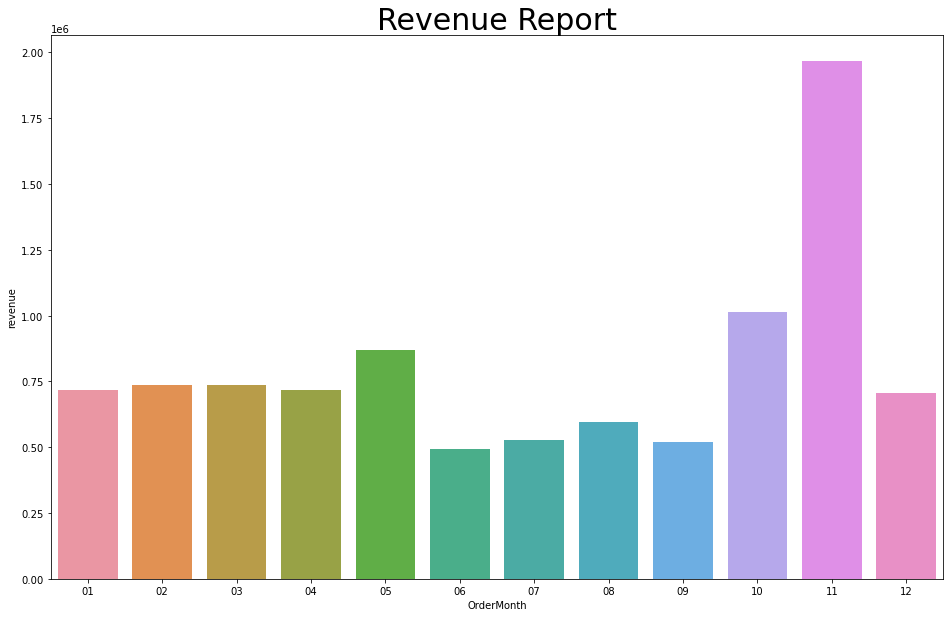

In [8]:
plt.figure(figsize=(16,10))
plt.title('Revenue Report', fontsize=30)
sns.barplot(x = result1.OrderMonth, y = result1.revenue)

### 2. 매출 창출에 기여도가 가장 큰 제품은?

- 제품별 매출액 테이블 생성
- 매출에 기여도가 가장 큰 제품은 S18_3232(1992 Ferrari 360 Spider red) 이다.
- 제품별 매출,순이익, 판매량 그래프 데이터를 확인해본 바 S18_3232 제품을 제외한 나머지 제품의 판매량은 비슷한 수량을 보이고 있다. 따라서 제품별 매출액 차이를 보이는 이유는 수량차이보다 판매가격 차이에 있다고 할 수 있다.
- 또한 제품별 비용구조가 좋지 않은 품목이 많아 매출액 점유율이 높더라도 창출되는 net revenue가 낮은 제품이 많다.
- 즉, 비용구조를 개선하여 수익성을 상승시킬 수 있을 것으로 확인된다.

In [9]:
result2 = df.groupby('productCode').sum().reset_index()[['productCode','quantityOrdered','buyprice','revenue','cost','profit']].drop(index=0)
result2 = result2.sort_values(by='revenue',ascending=False).reset_index(drop=True)
result2

,productCode,quantityOrdered,buyprice,revenue,cost,profit
0,S18_3232,1808.0,4128.70,276839.98,140843.20,135996.78
1,S12_1108,1019.0,2580.93,190755.86,97406.21,93349.65
2,S10_1949,961.0,2760.24,190017.96,94735.38,95282.58
3,S10_4698,985.0,2548.56,170686.00,89654.70,81031.30
4,S12_1099,933.0,2574.18,161531.48,88952.22,72579.26
...,...,...,...,...,...,...
103,S32_2206,906.0,651.78,33268.76,21870.84,11397.92
104,S24_2840,983.0,445.48,31627.96,15639.53,15988.43
105,S24_2972,912.0,438.48,30972.87,14810.88,16161.99
106,S24_3969,824.0,543.75,29763.39,17922.00,11841.39


(-1.106691821117592,
 1.1025461510165628,
 -1.1051352077116603,
 1.1002445500686626)

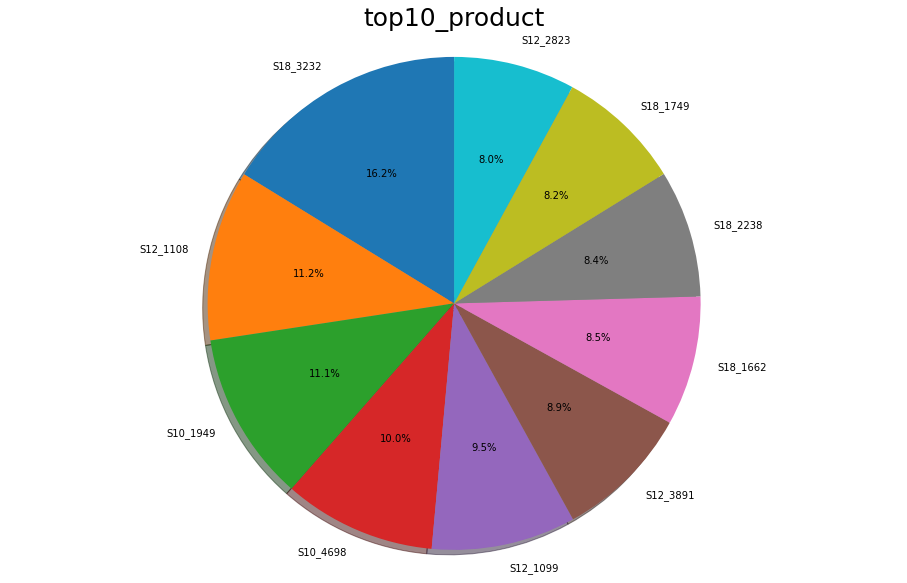

In [10]:
top10_product = result2.head(10)

plt.figure(figsize=(16,10))

sizes=top10_product.revenue
labels=top10_product.productCode
explode=(0,0,0.1,0)
plt.title('top10_product',fontsize = 25)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True,startangle=90)
plt.axis('equal')

<AxesSubplot:title={'center':'product Revenue Report'}, xlabel='productCode', ylabel='revenue'>

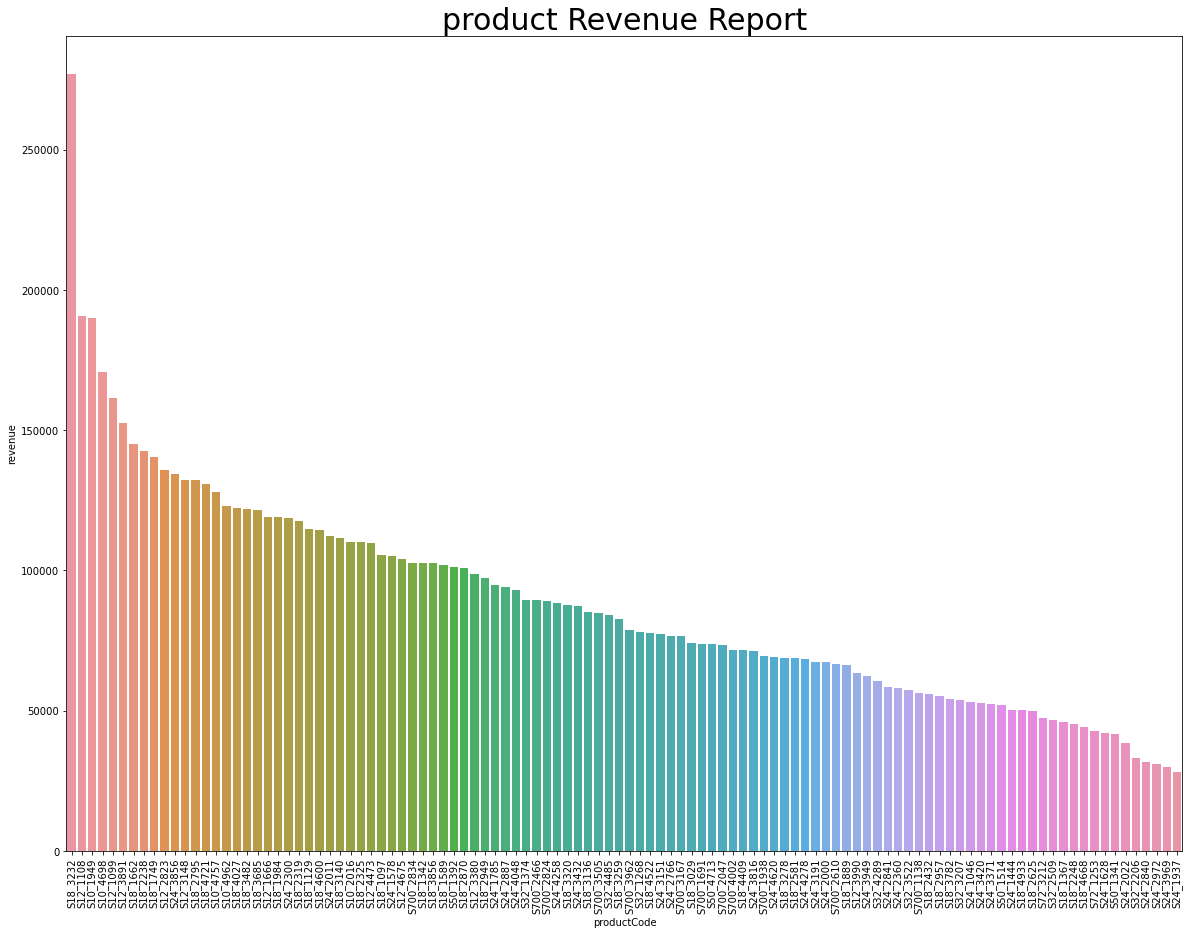

In [11]:
plt.figure(figsize=(20,15))
plt.title('product Revenue Report', fontsize=30)
plt.xticks(rotation = 90)
sns.barplot(x = result2.productCode, y = result2.revenue)

<AxesSubplot:title={'center':'product profit Report'}, xlabel='productCode', ylabel='profit'>

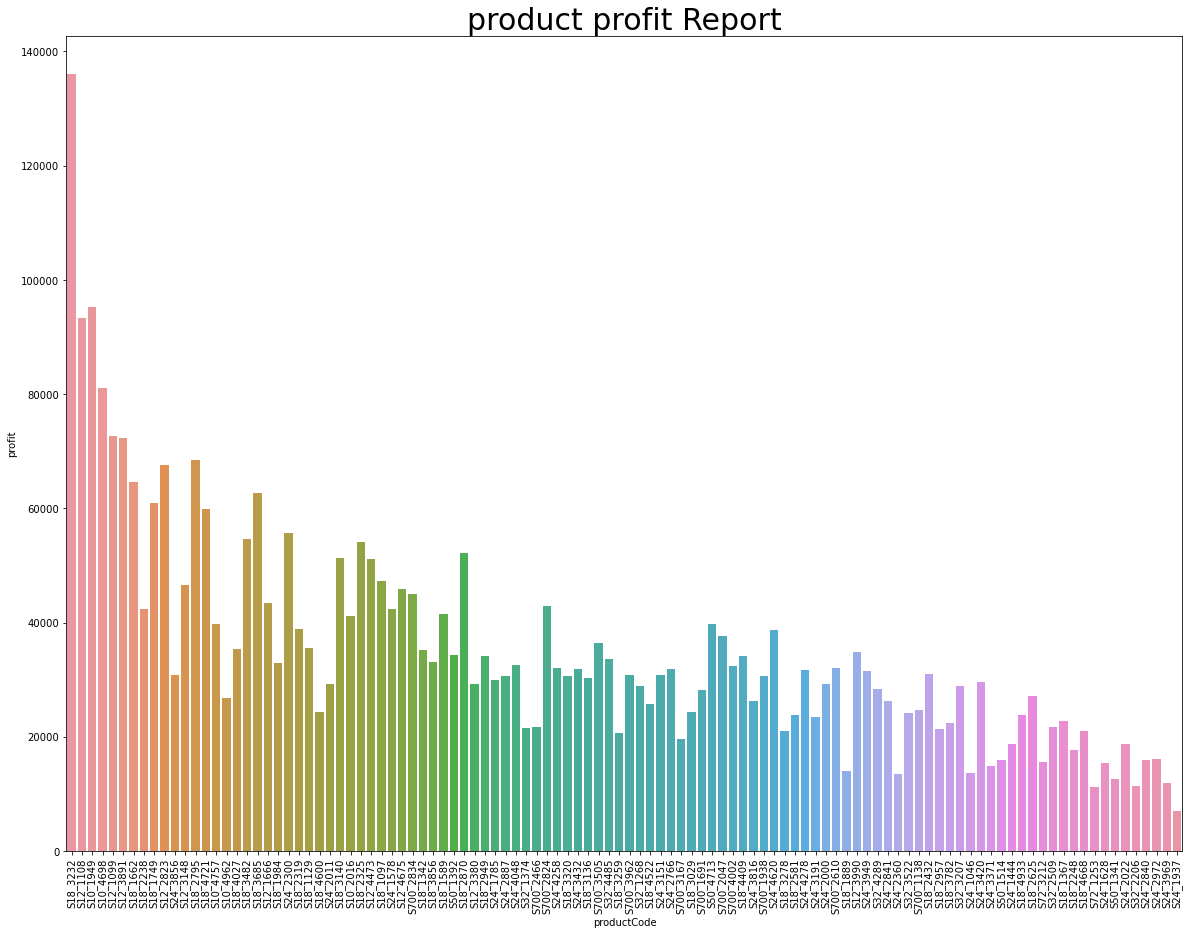

In [12]:
plt.figure(figsize=(20,15))
plt.title('product profit Report', fontsize=30)
plt.xticks(rotation = 90)
sns.barplot(x = result2.productCode, y = result2.profit)

<AxesSubplot:title={'center':'number of sales'}, xlabel='productCode', ylabel='quantityOrdered'>

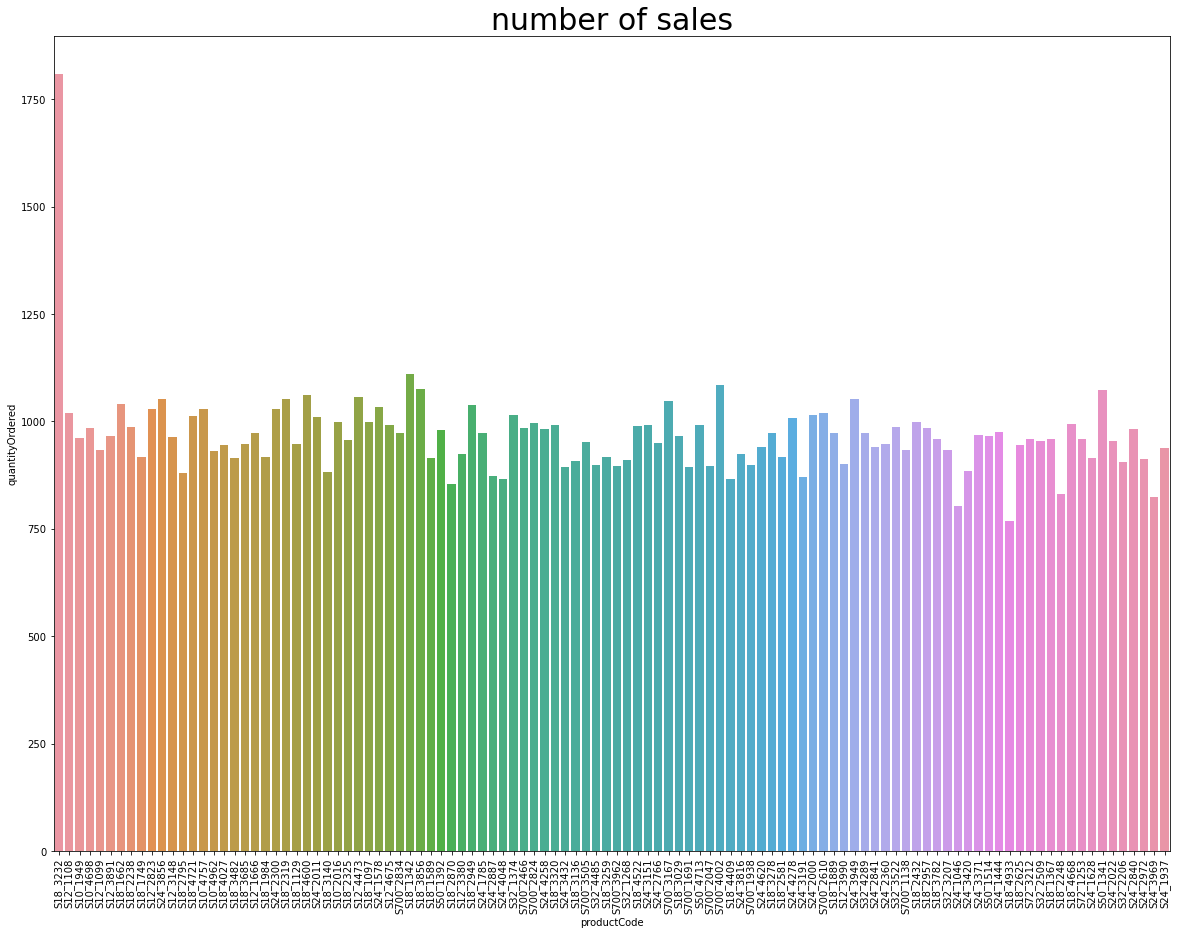

In [13]:
plt.figure(figsize=(20,15))
plt.title('number of sales', fontsize=30)
plt.xticks(rotation = 90)
sns.barplot(x = result2.productCode, y = result2.quantityOrdered)

### 3. 제품을 판매한 국가 비율은 어떻게 되는가?

- 제품 판매량과 매출 모두 미국이 압도적으로 많다.
- 미국의 경우 Classic cars와 Vintage cars의 비중이 가장 크며 다음으로 오토바이, 트럭 및 버스 판매량이 높다.

In [14]:
a = df.groupby('country').count()[['customerNumber','orderNumber']].reset_index()
b = df.groupby('country').sum()[['revenue','profit','cost']].reset_index()
result3 = pd.merge(a,b, how = 'left', on = 'country').sort_values(by='revenue',ascending = False)
result3

,country,customerNumber,orderNumber,revenue,profit,cost
27,USA,1005,1004,3273280.05,1308815.59,1964464.46
23,Spain,344,342,1099389.09,440004.54,659384.55
6,France,314,314,1007374.02,413016.12,594357.90
0,Australia,185,185,562582.59,222207.18,340375.41
14,New Zealand,149,149,476847.01,189506.58,287340.43
26,UK,144,144,436947.44,172964.26,263983.18
11,Italy,121,121,360616.81,144459.86,216156.95
5,Finland,92,92,295149.35,117239.33,177910.02
21,Singapore,80,79,263997.78,101782.55,162215.23
4,Denmark,63,63,218994.92,85629.30,133365.62


<AxesSubplot:title={'center':'counrty sales Report'}, xlabel='country', ylabel='profit'>

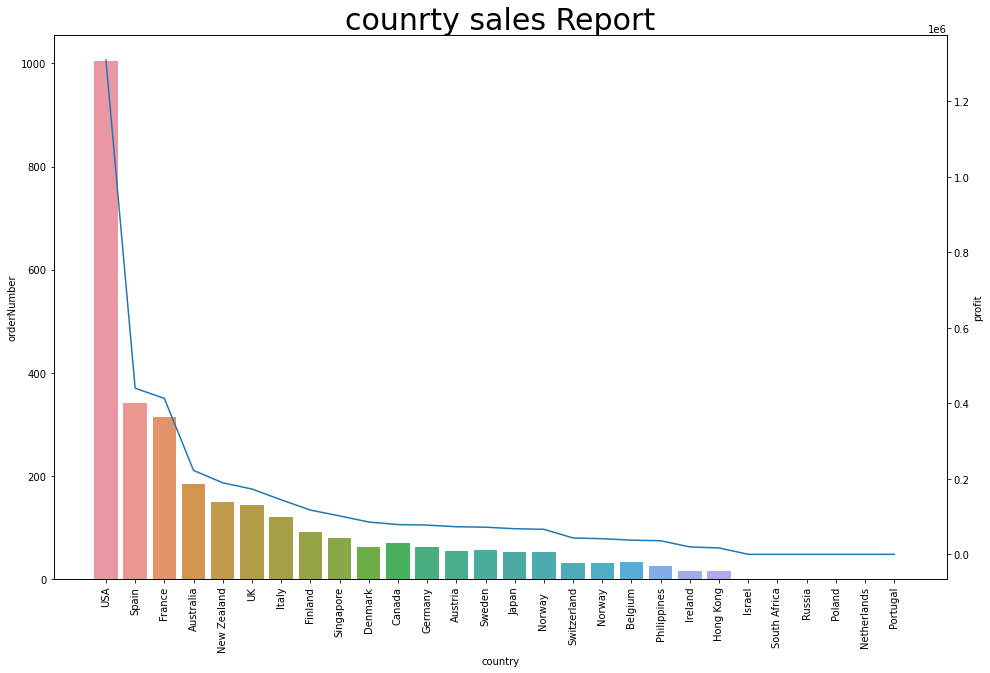

In [15]:
fig, ax1 = plt.subplots(1,figsize=(16,10))
ax2 = ax1.twinx()


plt.title('counrty sales Report', fontsize=30)
ax1.set_xticklabels(result3.country, rotation = 90)
sns.barplot(x = result3.country, y = result3.orderNumber,ax=ax1)
sns.lineplot(x = result3.country, y = result3.profit, ax=ax2)

In [16]:
result3_2 = df[df.country == 'USA']
a = result3_2.groupby('productCode').count()[['customerNumber','orderNumber']].reset_index()
b = result3_2.groupby('productCode').sum()[['revenue','profit','cost']].reset_index()
result3_2= pd.merge(a,b, how = 'left', on = 'productCode').sort_values(by='orderNumber',ascending = False)
result3_2


,productCode,customerNumber,orderNumber,revenue,profit,cost
39,S18_3232,16,16,76011.71,37762.81,38248.90
3,S10_4698,14,14,74524.35,35658.81,38865.54
14,S12_4473,14,14,54370.38,25239.28,29131.10
9,S12_2823,14,14,66150.36,33081.63,33068.73
31,S18_2625,13,13,22570.57,12030.52,10540.05
...,...,...,...,...,...,...
72,S24_3371,6,6,10261.68,2622.84,7638.84
108,S72_3212,6,6,10771.49,3611.99,7159.50
6,S12_1099,5,5,39503.49,18338.01,21165.48
43,S18_3482,5,5,24835.28,11313.12,13522.16


(-1.1046047430153416,
 1.1035450038303987,
 -1.1247262722750186,
 1.1011774415369056)

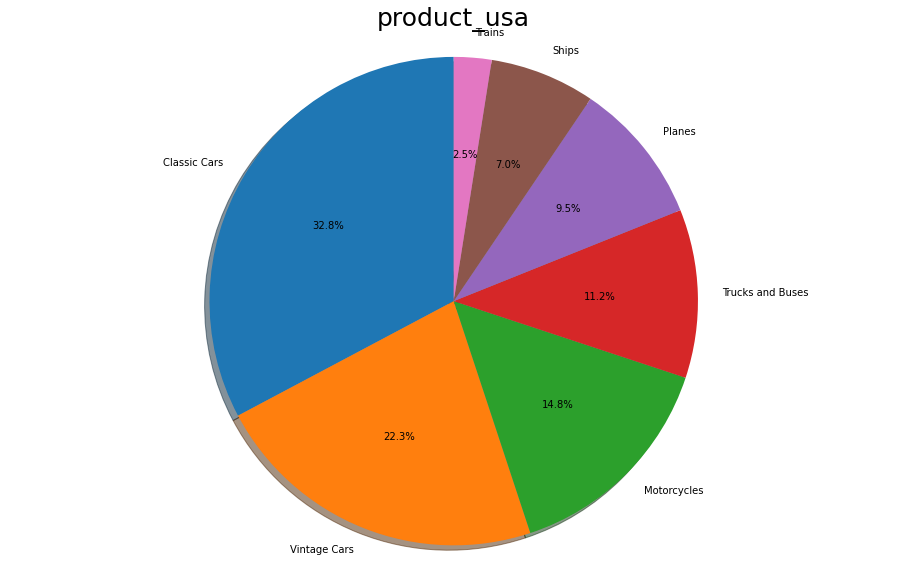

In [17]:
product_usa = df[df.country == 'USA'].pivot_table(index = ['country','productLine'],
                                                  values = 'orderNumber',aggfunc='count').reset_index().sort_values(by='orderNumber',ascending=False)



plt.figure(figsize=(16,10))

sizes=product_usa.orderNumber
labels=product_usa.productLine
explode=(0,0,0.1,0)
plt.title('product_usa',fontsize = 25)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True,startangle=90)
plt.axis('equal')

### 4. 배송완료, 진행중, 반품율은 어떻게 되며, 취소 및 분쟁 사유는 무엇인가?

- 사유는 non_shipped 테이블에서 확인할 수 있다.

In [24]:
a = df.groupby('status').count()[['customerNumber','orderNumber']].reset_index()
b = df.groupby('status').sum()[['revenue','profit','cost']].reset_index()
result4= pd.merge(a,b, how = 'left', on = 'status').sort_values(by='orderNumber',ascending = False).reset_index(drop=True)
result4

,status,customerNumber,orderNumber,revenue,profit,cost
0,Shipped,2771,2771,8865094.64,3537527.87,5327566.77
1,Cancelled,79,79,238854.18,94368.28,144485.90
2,Resolved,47,47,134235.88,53654.26,80581.62
3,On Hold,44,44,169575.61,61506.86,108068.75
4,In Process,41,41,135271.52,54259.74,81011.78
5,Disputed,14,14,61158.78,24563.24,36595.54


In [77]:
result4_2 = pd.DataFrame(round(result4.orderNumber/ result4.orderNumber.sum(),3))
result4_2.insert(0,'status', result4['status'])
result4_2.rename(columns={'orderNumber' : 'rate'},inplace  = True)
result4_2

,status,rate
0,Shipped,0.925
1,Cancelled,0.026
2,Resolved,0.016
3,On Hold,0.015
4,In Process,0.014
5,Disputed,0.005


In [95]:
non_shipped = pd.read_sql("select * from orders where status != 'shipped'",sql)[['orderNumber','status','comments']]
non_shipped

,orderNumber,status,comments
0,10164,Resolved,"This order was disputed, but resolved on 11/1/..."
1,10167,Cancelled,Customer called to cancel. The warehouse was n...
2,10179,Cancelled,Customer cancelled due to urgent budgeting iss...
3,10248,Cancelled,Order was mistakenly placed. The warehouse not...
4,10253,Cancelled,Customer disputed the order and we agreed to c...
5,10260,Cancelled,Customer heard complaints from their customers...
6,10262,Cancelled,This customer found a better offer from one of...
7,10327,Resolved,Order was disputed and resolved on 12/1/04. Th...
8,10334,On Hold,The outstaniding balance for this customer exc...
9,10367,Resolved,This order was disputed and resolved on 2/1/20...


In [98]:
list(non_shipped.comments)

["This order was disputed, but resolved on 11/1/2003; Customer doesn't like the colors and precision of the models.",
 "Customer called to cancel. The warehouse was notified in time and the order didn't ship. They have a new VP of Sales and are shifting their sales model. Our VP of Sales should contact them.",
 'Customer cancelled due to urgent budgeting issues. Must be cautious when dealing with them in the future. Since order shipped already we must discuss who would cover the shipping charges.',
 'Order was mistakenly placed. The warehouse noticed the lack of documentation.',
 'Customer disputed the order and we agreed to cancel it. We must be more cautions with this customer going forward, since they are very hard to please. We must cover the shipping fees.',
 'Customer heard complaints from their customers and called to cancel this order. Will notify the Sales Manager.',
 'This customer found a better offer from one of our competitors. Will call back to renegotiate.',
 "Order was 